In [26]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
# print("GPUs Available:", tf.config.list_physical_devices('GPU'))

# Ensure TensorFlow is not initialized
if tf.config.list_physical_devices('GPU'):
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Now you can run other TensorFlow operations

TensorFlow Version: 2.10.0


In [24]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from tensorflow.keras.backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

ImportError: cannot import name 'set_session' from 'tensorflow.keras.backend' (c:\Users\team1\miniconda3\envs\tf\lib\site-packages\keras\api\_v2\keras\backend\__init__.py)

In [25]:
len(tf.config.list_physical_devices('GPU'))>0

True

In [5]:
import tensorflow as tf

my_device = tf.device("/cpu:0")

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [9]:
df = pd.read_csv('C:/Users/team1/Documents/GitHub/CNN_Movie-Classification/movie_dataset/train.csv')

In [10]:
df = df.head(5000)

In [11]:
df.shape

(5000, 27)

---
#### Using GPU Tensor

In [13]:
# Assuming df is your DataFrame with image IDs

width = 350
height = 350
X = []

for i in tqdm(range(df.shape[0])):
    path = 'movie_dataset/Images/'+df['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X).astype('float32')
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()

# Convert numpy arrays to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X, y))

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(32)  # Use a buffer size that fits your memory

100%|██████████| 5000/5000 [00:09<00:00, 537.90it/s]


---

In [6]:
from tensorflow.keras.preprocessing import image

width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
    path = 'movie_dataset/Images/'+df['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(width, height, 3))  # Correct usage
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 2000/2000 [00:03<00:00, 589.59it/s]


In [14]:
X.shape

(5000, 350, 350, 3)

In [15]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(5000, 25)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [18]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 348, 348, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 348, 348, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 174, 174, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 174, 174, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_5 (Batc  (None, 172, 172, 32)    

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# import gc

In [16]:
# gc.collect()

1103

In [21]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test), batch_size=2)

Epoch 1/5
2250/2250 [==============================] - 194s 86ms/step - loss: 0.3109 - accuracy: 0.2427 - val_loss: 0.2712 - val_accuracy: 0.1840
Epoch 2/5
2250/2250 [==============================] - 190s 84ms/step - loss: 0.2551 - accuracy: 0.2544 - val_loss: 0.2817 - val_accuracy: 0.3040
Epoch 3/5
2250/2250 [==============================] - 190s 84ms/step - loss: 0.2482 - accuracy: 0.2769 - val_loss: 0.2344 - val_accuracy: 0.3240
Epoch 4/5
2250/2250 [==============================] - 193s 86ms/step - loss: 0.2448 - accuracy: 0.2918 - val_loss: 0.2287 - val_accuracy: 0.3580
Epoch 5/5
2250/2250 [==============================] - 201s 89ms/step - loss: 0.2438 - accuracy: 0.2764 - val_loss: 0.2318 - val_accuracy: 0.3720


In [22]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

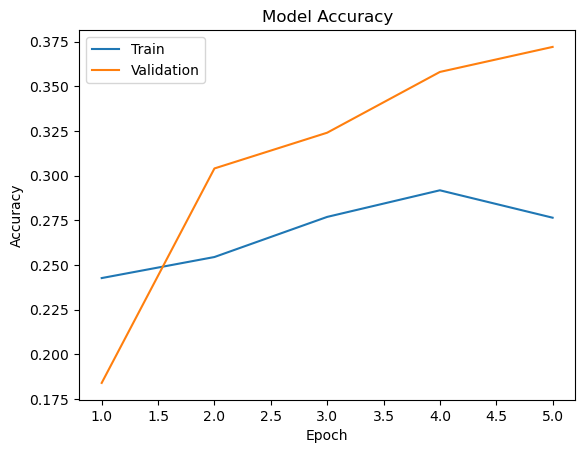

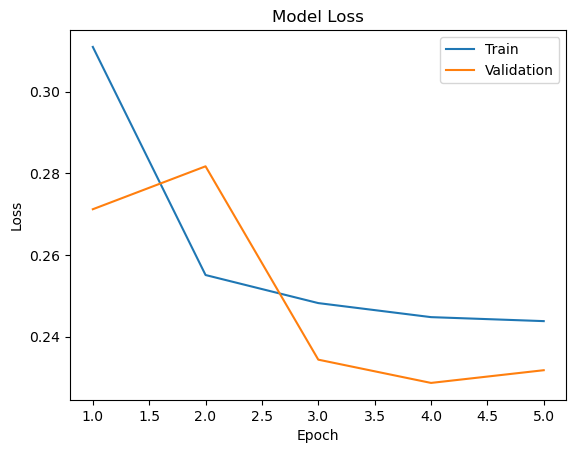

In [23]:
plotLearningCurve(history,5)

In [27]:
model.save('C:/Users/team1/Documents/GitHub/CNN_Movie-Classification/model_1.h5')